In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None

In [2]:
#Reading merged business and review csv file.
restaurant = pd.read_csv("yelp_reviews_restaurants.csv")

In [3]:
#Exploratory Data Analysis

In [4]:
#Summary of restaurant.csv
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17923 entries, 0 to 17922
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   17923 non-null  object 
 1   name          17923 non-null  object 
 2   address       17923 non-null  object 
 3   city          17923 non-null  object 
 4   state         17923 non-null  object 
 5   stars         17923 non-null  float64
 6   review_count  17923 non-null  int64  
 7   is_open       17923 non-null  int64  
 8   attributes    17923 non-null  object 
 9   categories    17923 non-null  object 
 10  review_id     17923 non-null  object 
 11  user_id       17923 non-null  object 
 12  review_stars  17923 non-null  int64  
 13  text          17923 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.9+ MB


In [5]:
#First five rows of restaurant.csv
restaurant.head()

,business_id,name,address,city,state,stars,review_count,is_open,attributes,categories,review_id,user_id,review_stars,text
0,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",nZWz5hiAsH4p7qK5yCtzuw,FiLuPv1YhEMosMdJKY6fLQ,3,"Very affordable sushi joint, but I was disappo..."
1,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",xFJR_t-Et4sP_BCWR7mKYA,MRtLDOIlij6grb4GTXJgPg,5,"Love the food here! Always fresh, large portio..."
2,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",yUIHV1oDEZRITw75OLaeww,5lRQDrzXb8cJqIEouII0kA,4,Good sushi. The sashimi was fresh and the kimc...
3,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",YpYqke8Caon3sKpqxRPQeA,jpIGlAym6z88W2xzHiK5_A,4,This place always have long lineup. \nThe Cons...
4,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",ZBCcVlrscQTdcRzJihoPRg,PgkWVoFV7BRuxff-t-mVKw,4,Place has a trendy atmosphere and food is okay...


In [6]:
#Drop any rows with NA values
restaurant = restaurant.dropna()

#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
address         Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is     0
categories      Missing value is     0
review_id       Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

In [7]:
#Removing rows with review counts less than 100
restaurant = restaurant[restaurant['review_count'] >= 100]

In [8]:
#Vertical Graph Function
def vertical_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

    plt.show()

In [9]:
#Horizontal Graph Function
def horizontal_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        width = rect.get_width()
        ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

    plt.show()


In [10]:
#Extracting only restaurant data and user data
business_only = restaurant[['business_id', 'name', 'address', 'city', 'stars', 'review_count', 'attributes', 'categories']].drop_duplicates('address')
user_only = restaurant[['business_id', 'name', 'review_id','user_id','review_stars', 'text']]

In [11]:
#Average rating for all the restaurants
business_only['stars'].mean()

3.6875

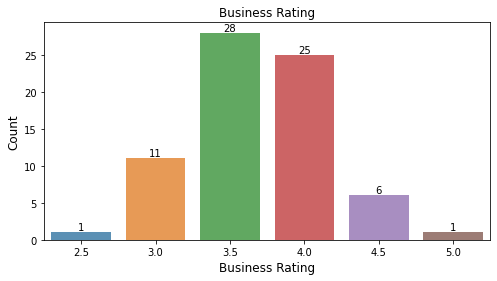

In [12]:
#Business Rating Graph
vertical_bar(business_only['stars'], 'Business Rating', 'Business Rating', 'Count')

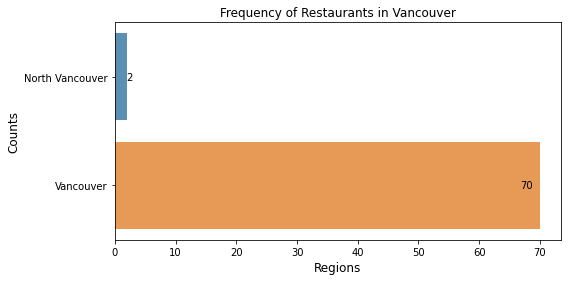

In [13]:
#Frequeny graph for different regions of Vancouver
horizontal_bar(business_only['city'], 'Frequency of Restaurants in Vancouver', 'Regions', 'Counts')

In [14]:
#Transforming category column into corpus
categories_text = "".join(restaurant['categories'])
categories_text = categories_text.split(',')

In [15]:
#Counting category words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(categories_text)

In [16]:
#Counts frequency of words and transforming into dictionary
word_list = vectorizer.get_feature_names()
count_list = X.toarray().sum(axis=0)
dict_words = dict(zip(word_list, count_list))

In [17]:
#Most common words in categories
new_dict_words = {k: v for k, v in sorted(dict_words.items(), key=lambda item: item[1], reverse=True)[:11]}


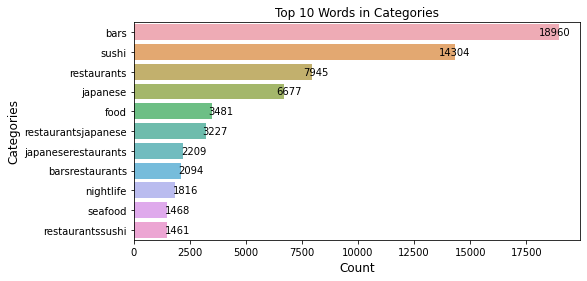

In [18]:
#Graph of most common word categories
plt.figure(figsize=(8,4))
ax = sns.barplot(x=list(new_dict_words.values()), y=list(new_dict_words.keys()), alpha=0.8, orient='h')
plt.title("Top 10 Words in Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = list(new_dict_words.values())
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

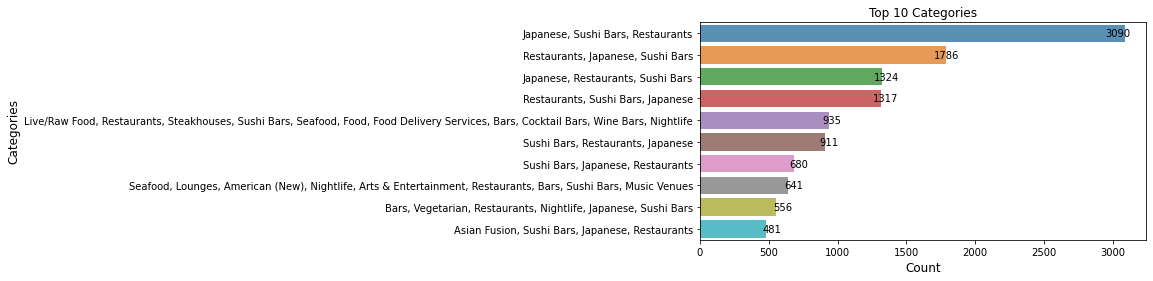

In [19]:
#Frequeny graph for Top 10 categories/cuisine
x=restaurant['categories'].value_counts()[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title("Top 10 Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

In [20]:
#Average rating given by users
user_only['review_stars'].mean()

3.8242481727389386

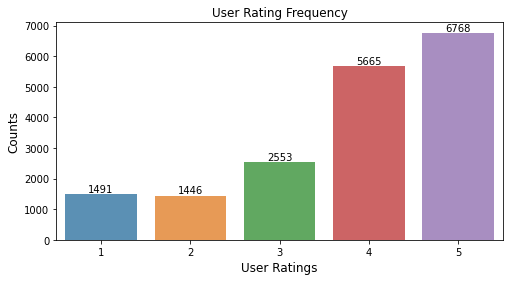

In [21]:
#User Ratings Graph
vertical_bar(user_only['review_stars'], 'User Rating Frequency','User Ratings', 'Counts')

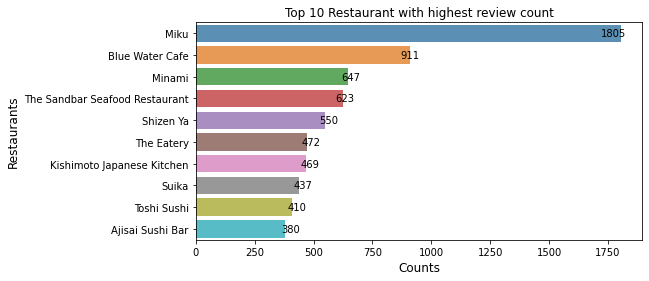

In [22]:
#Graph of Top Highest Review Count Restaurants
x=business_only['review_count'].sort_values(ascending=False)[:10].rename(index=business_only.name)

#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Restaurant with highest review count')
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

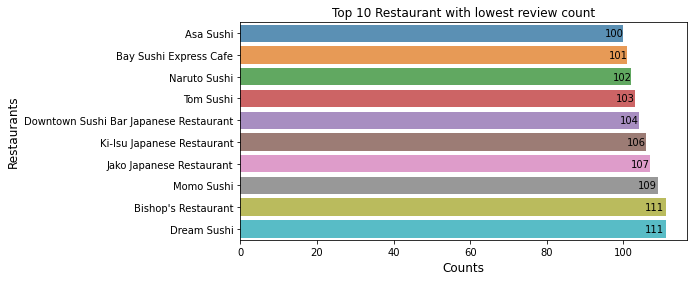

In [23]:
#Graph of Lowest Review Count Restaurants
x=business_only['review_count'].sort_values()[:10].rename(index=restaurant.name)

#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Restaurant with lowest review count')
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

In [24]:
#Exploratory Data Analysis: Sentiment Analysis

import nltk
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Extracting positive and negative sentiments
#Extracting objective and subjective statements
df_sentiment = user_only[['name', 'text']]
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [26]:
#Creating columns for Polarity and Subjectivity
df_sentiment.loc[:,'Polarity'] = df_sentiment['text'].apply(pol)
df_sentiment.loc[:,'Subjectivity'] = df_sentiment['text'].apply(sub)
df_sentiment.head()


,name,text,Polarity,Subjectivity
0,Sushi California,"Very affordable sushi joint, but I was disappo...",0.075000,0.548529
1,Sushi California,"Love the food here! Always fresh, large portio...",0.484821,0.569643
2,Sushi California,Good sushi. The sashimi was fresh and the kimc...,0.400000,0.550000
3,Sushi California,This place always have long lineup. \nThe Cons...,0.226319,0.487687
4,Sushi California,Place has a trendy atmosphere and food is okay...,0.485714,0.657143


In [27]:
#Creating column for Polarity type
df_sentiment['Sentiment_Type'] = ''
df_sentiment.loc[df_sentiment.Polarity > 0, 'Sentiment_Type'] = 'Positive'
df_sentiment.loc[df_sentiment.Polarity < 0, 'Sentiment_Type'] = 'Negative'
df_sentiment.loc[df_sentiment.Polarity == 0, 'Sentiment_Type'] = 'Neutral'

In [28]:
#Creating column for Subjectivity type
df_sentiment['Subjectivity_Type'] = ''
df_sentiment.loc[df_sentiment.Polarity >= 0.5, 'Subjectivity_Type'] = 'Subjective'
df_sentiment.loc[df_sentiment.Polarity < 0.5, 'Subjectivity_Type'] = 'Objective'
df_sentiment.head()

,name,text,Polarity,Subjectivity,Sentiment_Type,Subjectivity_Type
0,Sushi California,"Very affordable sushi joint, but I was disappo...",0.075000,0.548529,Positive,Objective
1,Sushi California,"Love the food here! Always fresh, large portio...",0.484821,0.569643,Positive,Objective
2,Sushi California,Good sushi. The sashimi was fresh and the kimc...,0.400000,0.550000,Positive,Objective
3,Sushi California,This place always have long lineup. \nThe Cons...,0.226319,0.487687,Positive,Objective
4,Sushi California,Place has a trendy atmosphere and food is okay...,0.485714,0.657143,Positive,Objective


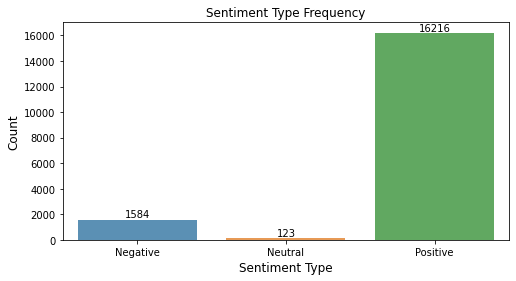

In [29]:
#Frequency graph of Polarity Type
vertical_bar(df_sentiment['Sentiment_Type'], 'Sentiment Type Frequency', 'Sentiment Type', 'Count')

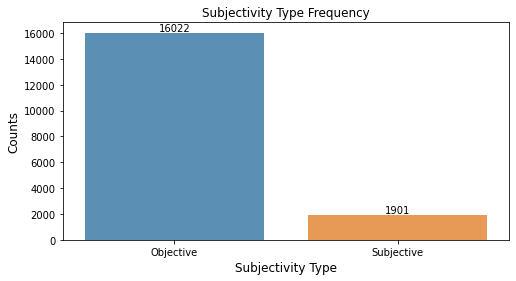

In [30]:
#Frequency graph of Subjectivity Type
vertical_bar(df_sentiment['Subjectivity_Type'], 'Subjectivity Type Frequency', 'Subjectivity Type', 'Counts')


In [31]:
#Creating Positive and Negative Corpus
Positive_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Positive']
Negative_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Negative']

In [32]:
#Combine dataframe text column
Positive_words = " ".join(Positive_Text.text)
Negative_words = " ".join(Negative_Text.text)


In [33]:
#Counts positive frequency of words
#Learn the vocabulary dictionary and return document-term matrix.
positive_count = vectorizer.fit_transform([Positive_words])
word_list = vectorizer.get_feature_names()
count_list = positive_count.toarray().sum(axis=0)
positive_combine = dict(zip(word_list, count_list))
new_dict_positive = {k: v for k, v in sorted(positive_combine.items(), key=lambda item: item[1], reverse=True)[:100]}


In [34]:
#Counts frequency negative words
#Learn the vocabulary dictionary and return document-term matrix.
negative_count = vectorizer.fit_transform([Negative_words])
word_list = vectorizer.get_feature_names()
count_list = positive_count.toarray().sum(axis=0)
negative_combine = dict(zip(word_list, count_list))
new_dict_negative = {k: v for k, v in sorted(negative_combine.items(), key=lambda item: item[1], reverse=True)[:100]}


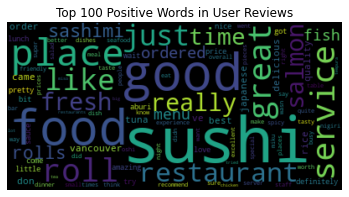

In [35]:
#Creating Wordcloud for Top 100 Positive words
wordcloud_pos = WordCloud().generate_from_frequencies(new_dict_positive)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Top 100 Positive Words in User Reviews")
plt.axis("off")
plt.show()

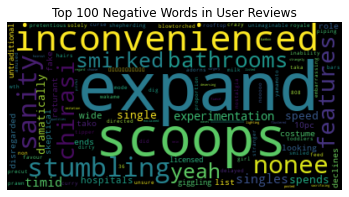

In [36]:
#Creating Wordcloud for Top 100 Negative words
wordcloud_neg = WordCloud().generate_from_frequencies(new_dict_negative)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Top 100 Negative Words in User Reviews")
plt.axis("off")
plt.show()

In [37]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

In [38]:
# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")

In [39]:
#Seperating nested dictionaries and creating columns for them
business_only['new_attributes'] = business_only.apply(lambda x: str_to_dict(x.attributes), axis=1)
business_only['Business_Parking'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'BusinessParking')), axis=1)
business_only['Ambience'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Ambience')), axis=1)
business_only['Good_For_Meal'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'GoodForMeal')), axis=1)
business_only['Dietary'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Dietary')), axis=1)
business_only['Music'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Music')), axis=1)
business_only.drop('attributes', axis=1, inplace=True)
business_only.head()


,business_id,name,address,city,stars,review_count,categories,new_attributes,Business_Parking,Ambience,Good_For_Meal,Dietary,Music
0,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,3.5,280,"Japanese, Restaurants, Sushi Bars","{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
290,szPJyzsly0a5ZkehLAV1fA,Pokérrito,558 Dunsmuir Street,Vancouver,4.0,182,"Food, Sushi Bars, Poke, Japanese, Restaurants,...","{'RestaurantsTableService': 'False', 'WiFi': '...",None,"{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
477,5lVXZfJMFX-PJIdzk9gAlw,Kamei Baru,990 Smithe Street,Vancouver,3.5,125,"Desserts, Sushi Bars, Japanese, Seafood, Resta...","{'BikeParking': 'True', 'RestaurantsPriceRange...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': True, 'lunch':...",{},{}
608,6T0ceMqSLXHyLtsJLlEGbg,Yamato Sushi Restaurant,616 Davie Street,Vancouver,3.5,242,"Sushi Bars, Restaurants, Japanese","{'RestaurantsGoodForGroups': 'False', 'Restaur...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
862,4jM6Mvylg6eKUCh6HOdlKg,Samurai Japanese Restaurant,1108 Davie Street,Vancouver,3.5,259,"Japanese, Restaurants, Sushi Bars, Asian Fusion","{'OutdoorSeating': 'False', 'Caters': 'False',...","{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}


In [40]:
#Concatenate appropriate columns for dummie variables
df_attributes = pd.concat([business_only['new_attributes'].apply(pd.Series),
                                       business_only['Business_Parking'].apply(pd.Series),
                                       business_only['Ambience'].apply(pd.Series),
                                       business_only['Good_For_Meal'].apply(pd.Series),
                                       business_only['Dietary'].apply(pd.Series),
                                       ], axis=1)

In [41]:
#Dummies variable for attributes
df_attributes_dummies = pd.get_dummies(df_attributes)
df_attributes_dummies

,RestaurantsTakeOut_False,RestaurantsTakeOut_None,RestaurantsTakeOut_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',OutdoorSeating_False,OutdoorSeating_None,...,casual_True,dessert_False,latenight_False,latenight_True,lunch_False,lunch_True,dinner_False,dinner_True,brunch_False,breakfast_False
0,0,0,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,1,1
290,0,0,1,0,0,0,0,1,1,0,...,1,1,1,0,0,1,1,0,1,1
477,0,0,1,0,0,0,1,0,0,0,...,1,1,0,1,1,0,0,1,1,1
608,0,0,1,0,0,0,0,1,1,0,...,1,1,1,0,0,1,0,1,1,1
862,0,0,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16018,0,0,1,0,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,1,1
16074,0,0,1,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,1,1,1
16128,0,0,1,0,0,0,1,0,0,0,...,1,1,1,0,1,0,0,1,1,1
16163,0,0,1,0,0,1,0,0,1,0,...,1,1,1,0,0,0,0,1,1,1


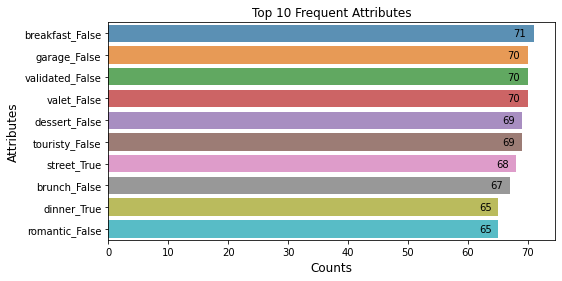

In [42]:
#Graph of Top Frequent Attributes
x=df_attributes_dummies.sum().sort_values(ascending=False)[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Frequent Attributes')
plt.ylabel('Attributes', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

In [43]:
#Dummies variable for categories
#df_categories_dummies = pd.Series(business_only['categories']).str.get_dummies(',')
#df_categories_dummies

In [44]:
#Combining features, name and rating
#df_final = pd.concat([df_attributes_dummies, df_categories_dummies, business_only[['name', 'stars']]], axis=1)
#df_final.iloc[:,:-2]


In [45]:
#Content Based Filtering using cosine similarity


In [46]:
#Construct a reverse map of indices and restaurant name
reset_business_only = business_only.reset_index()
indices = pd.Series(reset_business_only.index, index=business_only['name']).drop_duplicates()
indices


name
Sushi California                     0
Pokérrito                            1
Kamei Baru                           2
Yamato Sushi Restaurant              3
Samurai Japanese Restaurant          4
                                    ..
Tsuki Sushi Bar                     67
Kamei Royale Japanese Restaurant    68
Octopus Garden                      69
Sushi Yama                          70
Tomokazu                            71
Length: 72, dtype: int64

In [47]:
#Converting stars float into integer
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
reset_business_only['stars'] = reset_business_only['stars'].map(mapper)


In [48]:
#Convert Dictionary attributes column to string
for x in range(len(business_only['new_attributes'])):
    reset_business_only['new_attributes'][x] = ', '.join([''.join(i) for i in reset_business_only['new_attributes'][x].items()])

In [49]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
reset_business_only['new_attributes'] = reset_business_only['new_attributes'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(reset_business_only['new_attributes'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(72, 71)

In [50]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [51]:
# Function that takes in restaurant names as input and outputs most similar restaurants
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the restaurants that matches the name
    idx = indices[name]

    # Get the pairwsie similarity scores of all restaurant with input
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar restaurants
    sim_scores = sim_scores[1:11]

    # Get the restaurants indices
    restaurant_indices = [i[0] for i in sim_scores]
    value = [i[1] for i in sim_scores]

    # Return the top 10 most similar restaurants
    return list(zip(business_only['name'].iloc[restaurant_indices], value))

#Testing Content Based Filtering
get_recommendations('Blue Water Cafe')


[('The Sandbar Seafood Restaurant', 0.9268334482261906),
 ('The Diamond', 0.8897351155313985),
 ('Shizen Ya', 0.7896847487613503),
 ("Tojo's", 0.3129054654743034),
 ('Octopus Garden', 0.27026716178848287),
 ('Minami', 0.2306369919647813),
 ('Kobe Japanese Steakhouse', 0.22804992466134458),
 ('Temaki Sushi', 0.21810310258754523),
 ("Bishop's Restaurant", 0.2174657641492321),
 ('Miku', 0.21053464105586916)]

In [52]:
#Collaborative filtering using SVD

#userid=jpIGlAym6z88W2xzHiK5_A name=Sushi California

In [53]:
#Loading surprise modules
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

user_ratings = restaurant[['user_id', 'review_id', 'review_stars']]
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_ratings, reader)
# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2502  1.2398  1.2597  1.2272  1.2346  1.2423  0.0115  
MAE (testset)     0.9995  0.9847  1.0099  0.9904  0.9890  0.9947  0.0090  
Fit time          0.91    0.94    0.92    0.91    0.92    0.92    0.01    
Test time         0.02    0.02    0.02    0.02    0.09    0.03    0.03    


{'test_rmse': array([1.25020313, 1.23983872, 1.25971376, 1.227167  , 1.23462603]),
 'test_mae': array([0.99954408, 0.98474211, 1.00985949, 0.99036007, 0.98899979]),
 'fit_time': (0.9097163677215576,
  0.9426932334899902,
  0.922698974609375,
  0.9116902351379395,
  0.9235994815826416),
 'test_time': (0.016991376876831055,
  0.017007112503051758,
  0.016012907028198242,
  0.016994237899780273,
  0.08997130393981934)}

In [54]:
#Creating training and testing set
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
#trainset = data.build_full_trainset()

#Train trainset and predict ratings with testset
#algo.fit(trainset)
#predictions = algo.test(testset)
predictions = algo.fit(trainset).test(testset)

#Compute RMSE
#accuracy.rmse(predictions)

In [55]:
#Testing: Recommending restaurants with UserId jpIGlAym6z88W2xzHiK5_A and review_id lXC8tyUWpO1q9cXWhJ6xiQ
print(algo.predict('jpIGlAym6z88W2xzHiK5_A', 'lXC8tyUWpO1q9cXWhJ6xiQ'))


user: jpIGlAym6z88W2xzHiK5_A item: lXC8tyUWpO1q9cXWhJ6xiQ r_ui = None   est = 3.80   {'was_impossible': False}


In [56]:
#Setting index based on business_id
indices_map = reset_business_only.set_index('business_id')
indices_map_user = user_only.set_index('business_id')


In [57]:
#Testing svd prediction for userId 'poFcCIKo7M6fyvBXmuIOBw'
user_only['est'] = user_only['review_id'].apply(lambda x: algo.predict('poFcCIKo7M6fyvBXmuIOBw', x).est)
user_only = user_only.sort_values('est', ascending=False)
user_only[:10]

,business_id,name,review_id,user_id,review_stars,text,est
11466,wL4J5ytcddYRw_F9GobnlQ,Momo Sushi,J4lbc3FhoMxEHmgQWkuP_Q,1CkjIwVBP3_nrq3Nd0I2ZQ,5,Delicious sushi! We were staying at the Fairmo...,4.340088
8341,gt1BSfVFvzI-qHdJ3LUZug,Blue Water Cafe,OZrmUBsZmglBGq2MP2VTNg,UPp2hmLKPI0ZJozPQF-ruA,5,Service and food were amazing! Their seafood t...,4.332487
5825,4EV_ZcQmjAmP3pmO-_nb2A,Miku,GseMWVJqbFX0QZq5CPySTA,_3g-wdD3Fo3hoqyHZiFpKw,5,One of the best Japanese restaurants I've ever...,4.320251
11875,gV9lrbWr1CE1Jl0E58UO2g,Minami,o9PSz_cB7C1bJIxJ-_IhXA,2KkBpUn6K9H2Bfhj5mBoYw,5,Love this place! We found it on TripAdvisor a...,4.317452
17133,S6QRnCQVpEqQRyszrF51bw,Ajisai Sushi Bar,hbKkkPpw4zXC6b9pfuwWjg,T0TgIR9MvdDIWajKnUig3g,5,As good as it gets for sushi.\n\nIf you want g...,4.314060
6204,4EV_ZcQmjAmP3pmO-_nb2A,Miku,BMlJCCJfhTC7J7fN8xPbmQ,M9vmqhzMNqf17PxD84AutQ,5,"This place was awesome. Food was great, atmosp...",4.310926
3840,0d9r36yJ2Zg9ggcOaAZmQA,The Sandbar Seafood Restaurant,D0bJNKl5-4CxUwxD7X0hKg,tH-0BKCNRYEp9vr5YBui2Q,5,Lounge has a great atmosphere. Went here on a ...,4.300450
8666,4EV_ZcQmjAmP3pmO-_nb2A,Miku,TLkLbPFaZEN6F50SKR8vDA,poFcCIKo7M6fyvBXmuIOBw,5,"Great place, a little overpriced but definitel...",4.298642
5619,gt1BSfVFvzI-qHdJ3LUZug,Blue Water Cafe,09_KZHsqNi7tgLjmilx1Ig,SCE6wr7462SEwcMt1JhTpw,5,"Everything was awesome. From the bar, the win...",4.295145
6293,4EV_ZcQmjAmP3pmO-_nb2A,Miku,Vwc6_e9cSuY-um7lRBU6ow,hNyeCznNVxljCwFTzt2Z6Q,5,Was visiting Vancouver for the week and a frie...,4.293034


In [58]:
#Hybrid Recommender

def hybrid(userid, name):
    # Get the index of the restaurants that matches the title
    idx = indices[name]
    # Get the pairwsie similarity scores of all restaurants with the input
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar restaurants
    sim_scores = sim_scores[1:11]
    # Get the restaurants indices
    restaurant_indices = [i[0] for i in sim_scores]

    # Get restaurants with SVD after extracting similar restaurants
    restaurant = reset_business_only.iloc[restaurant_indices][['business_id', 'name','stars']]
    restaurant['est'] = restaurant['business_id'].apply(lambda x: algo.predict(userid, indices_map_user.loc[x]['review_id'][0]).est)
    restaurant = restaurant.sort_values('est', ascending=False)
    return restaurant

#Calling hybrid function
hybrid('jpIGlAym6z88W2xzHiK5_A', 'Miku')
#poFcCIKo7M6fyvBXmuIOBw

,business_id,name,stars,est
22,OULhS4WGI_mh5gRGLZBySg,Temaki Sushi,4,3.852421
29,EWwUwwhlshICZK7jFgaEjA,Naruto Sushi,4,3.758255
6,ERExev5XIiL3ShIlnHETQw,Masa Japanese Restaurant,4,3.714915
51,qebPYEXBp8Zo_d7GY50i2w,Westcoast Poke,4,3.623301
58,sz2eLUlDS6H0ict-qeyLHg,Sushi Hub,4,3.621907
44,gV9lrbWr1CE1Jl0E58UO2g,Minami,4,3.602705
60,TQj4HSCmm5GnriKMiSpqpQ,Raisu,4,3.602705
66,S6QRnCQVpEqQRyszrF51bw,Ajisai Sushi Bar,4,3.602705
41,34Fq-2nCOFN3gHPZLCqqJQ,Kimu Japanese Cuisine,4,3.576095
33,umv8zQBbJ5GgRT0qVHIpCg,Suika,4,3.525287


In [59]:
#Evaluation Metric of SVD for Threshold, Precision, Recall and F1.
final = []
for threshold in np.arange(0, 5.5, 0.5):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []
    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1
        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)
    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)

In [60]:
#Display Evaluation Metric
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0.0,4481,0,0,0,1.000000,1.00000,1.000000
1,0.5,4481,0,0,0,1.000000,1.00000,1.000000
2,1.0,4481,0,0,0,1.000000,1.00000,1.000000
3,1.5,4116,365,0,0,0.918545,1.00000,0.957543
4,2.0,4116,365,0,0,0.918545,1.00000,0.957543
5,2.5,3754,727,0,0,0.837759,1.00000,0.911718
6,3.0,3754,727,0,0,0.837759,1.00000,0.911718
7,3.5,3092,1314,42,33,0.701770,0.98944,0.821139
8,4.0,125,34,1322,3000,0.786164,0.04000,0.076127
9,4.5,0,0,2760,1721,0.000000,0.00000,0.000000
